# 1. Importing the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# 2. Loading the datasets

In [5]:
patients=pd.read_csv(r"D:\Github\Data analysis And EDA Project\Clinical Trial Data Analysis\patients (1).csv")
treatments=pd.read_csv(r"D:\Github\Data analysis And EDA Project\Clinical Trial Data Analysis\treatments (1).csv")
adverse_reactions=pd.read_csv(r"D:\Github\Data analysis And EDA Project\Clinical Trial Data Analysis\adverse_reactions (1).csv")
print("The Dataset has been loaded successfully ")

The Dataset has been loaded successfully 


In [9]:
print("Printing the patient dataset")
patients

Printing the patient dataset


,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852.0,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341.0,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110.0,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109.0,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7


In [10]:
print("Printing the treatment dataset")
treatments

Printing the treatment dataset


,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
...,...,...,...,...,...,...,...
275,albina,zetticci,45u - 51u,-,7.93,7.73,0.20
276,john,teichelmann,-,49u - 49u,7.90,7.58,NaN
277,mathea,lillebø,23u - 36u,-,9.04,8.67,0.37
278,vallie,prince,31u - 38u,-,7.64,7.28,0.36


In [11]:
print("Printing the adverse reaction dataset")
adverse_reactions

Printing the adverse reaction dataset


,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation
5,jasmine,sykes,hypoglycemia
6,louise,johnson,hypoglycemia
7,albinca,komavec,hypoglycemia
8,noe,aranda,hypoglycemia
9,sofia,hermansen,injection site discomfort


In [12]:
# understanding the patient data 
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [13]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [18]:
# checking for the duplicate for the patients table
duplicate=patients.duplicated().sum()
print(duplicate)
print('There are no duplicate in patients table')

0
There are no duplicate in patients table


In [20]:
# checking for the missing value in patients table
patients.isna().sum().sort_values(ascending=False)

address         12
city            12
contact         12
country         12
zip_code        12
state           12
given_name       0
surname          0
patient_id       0
assigned_sex     0
birthdate        0
weight           0
height           0
bmi              0
dtype: int64

In [24]:
patients[patients.isna().any(axis=1)]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [27]:
patients.fillna({'city':"Not Provided",'state':"Not Provided","zip_code":0,'country':"Not Provided","contact":0},inplace=True)

In [29]:
patients.isna().sum()

patient_id       0
assigned_sex     0
given_name       0
surname          0
address         12
city             0
state            0
zip_code         0
country          0
contact          0
birthdate        0
weight           0
height           0
bmi              0
dtype: int64

In [30]:
patients['address'].fillna("Not Provided",inplace=True)
patients.isna().sum()

C:\Users\mjhus\AppData\Local\Temp\ipykernel_13192\1261441955.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  patients['address'].fillna("Not Provided",inplace=True)


patient_id      0
assigned_sex    0
given_name      0
surname         0
address         0
city            0
state           0
zip_code        0
country         0
contact         0
birthdate       0
weight          0
height          0
bmi             0
dtype: int64

In [31]:
# checking for the outlier in patients table

def detect_outlier(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=df[(df[column]<lower_bound)| (df[column]>upper_bound)][column]
    return outliers

In [32]:
# finding outlier in the weight
weight_outlier=detect_outlier(patients,'weight')
print(weight_outlier)

210    48.8
Name: weight, dtype: float64


In [33]:
# height outlier 
height_outlier=detect_outlier(patients,'height')
print(height_outlier)

4    27
Name: height, dtype: int64


In [40]:
# removing the outlier in weight and heigh
patients=patients[~patients['weight'].isin(weight_outlier)]
patients.query('weight==48.8')

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi


In [41]:
patients=patients[~patients['height'].isin(height_outlier)]

In [42]:
patients.query('height==27')

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi


In [43]:
# Exploring the Treatments dataset
treatments.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [45]:
treatments.tail()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
275,albina,zetticci,45u - 51u,-,7.93,7.73,0.20
276,john,teichelmann,-,49u - 49u,7.90,7.58,NaN
277,mathea,lillebø,23u - 36u,-,9.04,8.67,0.37
278,vallie,prince,31u - 38u,-,7.64,7.28,0.36
279,samúel,guðbrandsson,53u - 56u,-,8.00,7.64,0.36


In [47]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    280 non-null    object 
 1   surname       280 non-null    object 
 2   auralin       280 non-null    object 
 3   novodra       280 non-null    object 
 4   hba1c_start   280 non-null    float64
 5   hba1c_end     280 non-null    float64
 6   hba1c_change  171 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [48]:
# checking the missing value in treatements table

treatments.isna().sum()

given_name        0
surname           0
auralin           0
novodra           0
hba1c_start       0
hba1c_end         0
hba1c_change    109
dtype: int64

In [49]:
# treating the missing value
treatments['hba1c_change']=treatments['hba1c_start']-treatments['hba1c_end']

In [50]:
treatments.isna().sum()

given_name      0
surname         0
auralin         0
novodra         0
hba1c_start     0
hba1c_end       0
hba1c_change    0
dtype: int64

In [51]:
# cleaning the treatments table
treatments['dose_start']=np.nan
treatments['dose_end']=np.nan
treatments['treatment']=''


In [52]:
treatments

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change,dose_start,dose_end,treatment
0,veronika,jindrová,41u - 48u,-,7.63,7.20,0.43,NaN,NaN,
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.47,NaN,NaN,
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,0.43,NaN,NaN,
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35,NaN,NaN,
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...
275,albina,zetticci,45u - 51u,-,7.93,7.73,0.20,NaN,NaN,
276,john,teichelmann,-,49u - 49u,7.90,7.58,0.32,NaN,NaN,
277,mathea,lillebø,23u - 36u,-,9.04,8.67,0.37,NaN,NaN,
278,vallie,prince,31u - 38u,-,7.64,7.28,0.36,NaN,NaN,


In [54]:
auralin_index=treatments[treatments['auralin']!='-'].index
auralin_index

Index([  0,   3,   6,   7,   9,  10,  12,  14,  15,  16,
       ...
       262, 263, 266, 270, 273, 274, 275, 277, 278, 279],
      dtype='int64', length=137)

In [55]:
novodra_index=treatments[treatments['novodra']!='-'].index

In [58]:
for idx in auralin_index:
    dose = treatments.loc[idx, 'auralin']
    start, end = dose.split('u - ')
    start=int(start)
    end=int(end[0:2])
    treatments.loc[idx, 'dose_start'] = start
    treatments.loc[idx, 'dose_end'] = end
    treatments.loc[idx, 'treatment'] = 'Auralin'

for idx in novodra_index:
    dose = treatments.loc[idx, 'novodra']
    start, end = dose.split('u - ')
    start=int(start)
    end=int(end[0:2])
    treatments.loc[idx, 'dose_start'] = start
    treatments.loc[idx, 'dose_end'] = end
    treatments.loc[idx, 'treatment'] = 'Novodra'

In [59]:
treatments

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change,dose_start,dose_end,treatment
0,veronika,jindrová,41u - 48u,-,7.63,7.20,0.43,41.0,48.0,Auralin
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.47,40.0,45.0,Novodra
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,0.43,39.0,36.0,Novodra
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35,33.0,36.0,Auralin
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32,33.0,29.0,Novodra
...,...,...,...,...,...,...,...,...,...,...
275,albina,zetticci,45u - 51u,-,7.93,7.73,0.20,45.0,51.0,Auralin
276,john,teichelmann,-,49u - 49u,7.90,7.58,0.32,49.0,49.0,Novodra
277,mathea,lillebø,23u - 36u,-,9.04,8.67,0.37,23.0,36.0,Auralin
278,vallie,prince,31u - 38u,-,7.64,7.28,0.36,31.0,38.0,Auralin


In [60]:
# droping original auralin and novodra columns
treatments=treatments.drop(['auralin','novodra'],axis=1)

In [61]:
treatments

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,dose_start,dose_end,treatment
0,veronika,jindrová,7.63,7.20,0.43,41.0,48.0,Auralin
1,elliot,richardson,7.56,7.09,0.47,40.0,45.0,Novodra
2,yukitaka,takenaka,7.68,7.25,0.43,39.0,36.0,Novodra
3,skye,gormanston,7.97,7.62,0.35,33.0,36.0,Auralin
4,alissa,montez,7.78,7.46,0.32,33.0,29.0,Novodra
...,...,...,...,...,...,...,...,...
275,albina,zetticci,7.93,7.73,0.20,45.0,51.0,Auralin
276,john,teichelmann,7.90,7.58,0.32,49.0,49.0,Novodra
277,mathea,lillebø,9.04,8.67,0.37,23.0,36.0,Auralin
278,vallie,prince,7.64,7.28,0.36,31.0,38.0,Auralin


In [63]:
# exploring the adverse_reaction dataset
adverse_reactions

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation
5,jasmine,sykes,hypoglycemia
6,louise,johnson,hypoglycemia
7,albinca,komavec,hypoglycemia
8,noe,aranda,hypoglycemia
9,sofia,hermansen,injection site discomfort


In [64]:
# checkning for the missing value in adverse reaction dataset

adverse_reactions.isna().sum()

given_name          0
surname             0
adverse_reaction    0
dtype: int64

In [65]:
# calculating age from birthdate
patients['birthdate'] = pd.to_datetime(patients['birthdate'])
patients['age'] = (pd.to_datetime('today') - patients['birthdate']).dt.days // 365


In [66]:
# Create BMI categories for count plot
bins = [0, 18.5, 25, 30, 40, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Severely Obese']
patients['bmi_cat'] = pd.cut(patients['bmi'], bins=bins, labels=labels)

In [67]:
patients

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi,age,bmi_cat
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,1976-07-10,121.7,66,19.6,48,Normal
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,1967-04-03,118.8,66,19.2,58,Normal
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,1980-02-19,177.8,71,24.8,45,Normal
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,1951-07-26,220.9,70,31.7,73,Obese
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,Florida,32114.0,United States,386-334-5237RafaelCardosoCosta@gustr.com,1931-08-31,183.9,70,26.4,93,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852.0,United States,207-477-0579MustafaLindstrom@jourrapide.com,1959-04-10,181.1,72,24.6,66,Normal
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341.0,United States,928-284-4492RumanBisliev@gustr.com,1948-03-26,239.6,70,34.4,77,Obese
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110.0,United States,816-223-6007JinkedeKeizer@teleworm.us,1971-01-13,171.2,67,26.8,54,Overweight
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109.0,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,1952-02-13,176.9,67,27.7,73,Overweight


In [89]:
# Merge treatments with patients to get age and bmi_cat
merged_data = treatments.merge(
    patients[['given_name', 'surname', 'age', 'bmi_cat']],
    on=['given_name', 'surname'],
    how='left')
merged_data.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,dose_start,dose_end,treatment,age,bmi_cat
0,veronika,jindrová,7.63,7.20,0.43,41.0,48.0,Auralin,NaN,NaN
1,elliot,richardson,7.56,7.09,0.47,40.0,45.0,Novodra,NaN,NaN
2,yukitaka,takenaka,7.68,7.25,0.43,39.0,36.0,Novodra,NaN,NaN
3,skye,gormanston,7.97,7.62,0.35,33.0,36.0,Auralin,NaN,NaN
4,alissa,montez,7.78,7.46,0.32,33.0,29.0,Novodra,NaN,NaN


In [79]:
# Merge adverse reactions with patients to get age
adverse_with_age = adverse_reactions.merge(
    patients[['given_name', 'surname', 'age']],
    on=['given_name', 'surname'],
    how='left'
)
adverse_with_age.head()

,given_name,surname,adverse_reaction,age
0,berta,napolitani,injection site discomfort,NaN
1,lena,baer,hypoglycemia,NaN
2,joseph,day,hypoglycemia,NaN
3,flavia,fiorentino,cough,NaN
4,manouck,wubbels,throat irritation,NaN


In [80]:
#checking the missing value in merged_data
merged_data.isna().sum().sort_values(ascending=False)

bmi_cat         280
age             280
surname           0
given_name        0
hba1c_start       0
hba1c_end         0
dose_start        0
hba1c_change      0
treatment         0
dose_end          0
dtype: int64

In [93]:
# insight due to unclean name and surname the we are not merging properly therefore cleaning the name and surname for proper merging
import unicodedata
def clean_name(name):
    if pd.isna(name):
        return ''
    # Normalize accents, convert to lowercase, strip spaces
    name = unicodedata.normalize('NFKD', str(name)).encode('ASCII', 'ignore').decode('ASCII')
    return name.lower().strip()

patients['given_name_clean'] = patients['given_name'].apply(clean_name)
patients['surname_clean'] = patients['surname'].apply(clean_name)
treatments['given_name_clean'] = treatments['given_name'].apply(clean_name)
treatments['surname_clean'] = treatments['surname'].apply(clean_name)
adverse_reactions['given_name_clean'] = adverse_reactions['given_name'].apply(clean_name)
adverse_reactions['surname_clean'] = adverse_reactions['surname'].apply(clean_name)


In [94]:
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi,age,bmi_cat,given_name_clean,surname_clean
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,1976-07-10,121.7,66,19.6,48,Normal,zoe,wellish
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,1967-04-03,118.8,66,19.2,58,Normal,pamela,hill
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,1980-02-19,177.8,71,24.8,45,Normal,jae,debord
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,1951-07-26,220.9,70,31.7,73,Obese,liem,phan
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,Florida,32114.0,United States,386-334-5237RafaelCardosoCosta@gustr.com,1931-08-31,183.9,70,26.4,93,Overweight,rafael,costa


In [95]:
treatments.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,dose_start,dose_end,treatment,given_name_clean,surname_clean
0,veronika,jindrová,7.63,7.20,0.43,41.0,48.0,Auralin,veronika,jindrova
1,elliot,richardson,7.56,7.09,0.47,40.0,45.0,Novodra,elliot,richardson
2,yukitaka,takenaka,7.68,7.25,0.43,39.0,36.0,Novodra,yukitaka,takenaka
3,skye,gormanston,7.97,7.62,0.35,33.0,36.0,Auralin,skye,gormanston
4,alissa,montez,7.78,7.46,0.32,33.0,29.0,Novodra,alissa,montez


In [96]:
adverse_reactions.head()

,given_name,surname,adverse_reaction,given_name_clean,surname_clean
0,berta,napolitani,injection site discomfort,berta,napolitani
1,lena,baer,hypoglycemia,lena,baer
2,joseph,day,hypoglycemia,joseph,day
3,flavia,fiorentino,cough,flavia,fiorentino
4,manouck,wubbels,throat irritation,manouck,wubbels


In [100]:
#now merging treatment with patient using cleaned names

merged_data1 = treatments.merge(
    patients[['given_name_clean', 'surname_clean', 'age', 'bmi_cat']],
    on=['given_name_clean', 'surname_clean'],
    how='left'
)

merged_data1.head()


,given_name,surname,hba1c_start,hba1c_end,hba1c_change,dose_start,dose_end,treatment,given_name_clean,surname_clean,age,bmi_cat
0,veronika,jindrová,7.63,7.20,0.43,41.0,48.0,Auralin,veronika,jindrova,44.0,Obese
1,elliot,richardson,7.56,7.09,0.47,40.0,45.0,Novodra,elliot,richardson,52.0,Normal
2,yukitaka,takenaka,7.68,7.25,0.43,39.0,36.0,Novodra,yukitaka,takenaka,80.0,Overweight
3,skye,gormanston,7.97,7.62,0.35,33.0,36.0,Auralin,skye,gormanston,91.0,Overweight
4,alissa,montez,7.78,7.46,0.32,33.0,29.0,Novodra,alissa,montez,74.0,Overweight


In [101]:
# now merging adverse reaction with patient 
adverse_with_age = adverse_reactions.merge(
    patients[['given_name_clean', 'surname_clean', 'age']],
    on=['given_name_clean', 'surname_clean'],
    how='left'
)

adverse_with_age.head()

,given_name,surname,adverse_reaction,given_name_clean,surname_clean,age
0,berta,napolitani,injection site discomfort,berta,napolitani,66
1,lena,baer,hypoglycemia,lena,baer,47
2,joseph,day,hypoglycemia,joseph,day,39
3,flavia,fiorentino,cough,flavia,fiorentino,87
4,manouck,wubbels,throat irritation,manouck,wubbels,60


In [104]:
#checking the missing value in merged dataset

merged_data1.isna().sum().sort_values(ascending=False)

bmi_cat             2
age                 2
given_name          0
surname             0
hba1c_end           0
hba1c_start         0
hba1c_change        0
dose_start          0
treatment           0
dose_end            0
surname_clean       0
given_name_clean    0
dtype: int64

In [105]:
adverse_with_age.isna().sum().sort_values(ascending=False)

given_name          0
surname             0
adverse_reaction    0
given_name_clean    0
surname_clean       0
age                 0
dtype: int64

In [113]:
#handling the missing value by filling with median strategy
median_age=merged_data1['age'].median()
merged_data1['age'].fillna(median_age,inplace=True)


C:\Users\mjhus\AppData\Local\Temp\ipykernel_13192\394782607.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data1['age'].fillna(median_age, inplace=True)


In [119]:
merged_data1[merged_data1['bmi_cat'].isna()]

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,dose_start,dose_end,treatment,given_name_clean,surname_clean,age,bmi_cat
16,camilla,zaitseva,7.53,7.13,0.40,28.0,37.0,Auralin,camilla,zaitseva,69.0,NaN
128,david,gustafsson,7.72,7.28,0.44,33.0,34.0,Novodra,david,gustafsson,69.0,NaN


In [123]:
merged_data1['bmi_cat'].fillna('Overweight',inplace=True)

In [124]:
merged_data1.isna().sum()

given_name          0
surname             0
hba1c_start         0
hba1c_end           0
hba1c_change        0
dose_start          0
dose_end            0
treatment           0
given_name_clean    0
surname_clean       0
age                 0
bmi_cat             0
dtype: int64

In [125]:
print("Data Preprocessing has been completed")

Data Preprocessing has been completed


In [127]:
# Analyze HbA1c reduction
print("\nAnalyzing HbA1c reduction...")
hba1c_means = merged_data1.groupby('treatment')['hba1c_change'].mean()
print("\nMean HbA1c change by treatment:")
print(hba1c_means)



Analyzing HbA1c reduction...

Mean HbA1c change by treatment:
treatment
Auralin    0.385985
Novodra    0.406853
Name: hba1c_change, dtype: float64


In [128]:
#Statistical test for HbA1c change
print("Performing t-test for HbA1c change...")
auralin_data = merged_data1[merged_data1['treatment'] == 'Auralin']['hba1c_change']
novodra_data = merged_data1[merged_data1['treatment'] == 'Novodra']['hba1c_change']

mean1 = auralin_data.mean()
mean2 = novodra_data.mean()
var1 = auralin_data.var()
var2 = novodra_data.var()
n1 = len(auralin_data)
n2 = len(novodra_data)
diff = mean1 - mean2

Performing t-test for HbA1c change...


In [129]:
print(f"\nAuralin: mean={mean1:.3f}, variance={var1:.3f}, n={n1}")
print(f"Novodra: mean={mean2:.3f}, variance={var2:.3f}, n={n2}")
print(f"Difference in means (Auralin - Novodra): {diff:.3f}")

t_stat, p_value = ttest_ind(auralin_data, novodra_data, equal_var=False)
print(f"\nT-test results: t-statistic={t_stat:.3f}, p-value={p_value:.3f}")

if p_value < 0.05:
    print("Result: Significant difference in HbA1c change (p < 0.05).")
else:
    print("Result: No significant difference in HbA1c change (p >= 0.05).")


Auralin: mean=0.386, variance=0.004, n=137
Novodra: mean=0.407, variance=0.003, n=143
Difference in means (Auralin - Novodra): -0.021

T-test results: t-statistic=-2.939, p-value=0.004
Result: Significant difference in HbA1c change (p < 0.05).



Creating HbA1c box plot...


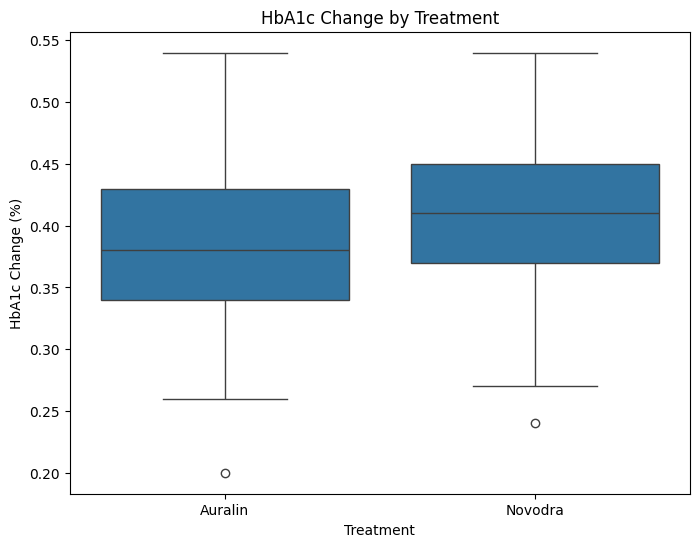

HbA1c box plot saved as 'hba1c_boxplot.png'


In [131]:
#Visualize HbA1c changes
print("\nCreating HbA1c box plot...")
plt.figure(figsize=(8, 6))
sns.boxplot(x='treatment', y='hba1c_change', data=merged_data)
plt.title('HbA1c Change by Treatment')
plt.xlabel('Treatment')
plt.ylabel('HbA1c Change (%)')
plt.show()
plt.close()
print("HbA1c box plot saved as 'hba1c_boxplot.png'")


Creating count plot of BMI categories by treatment...


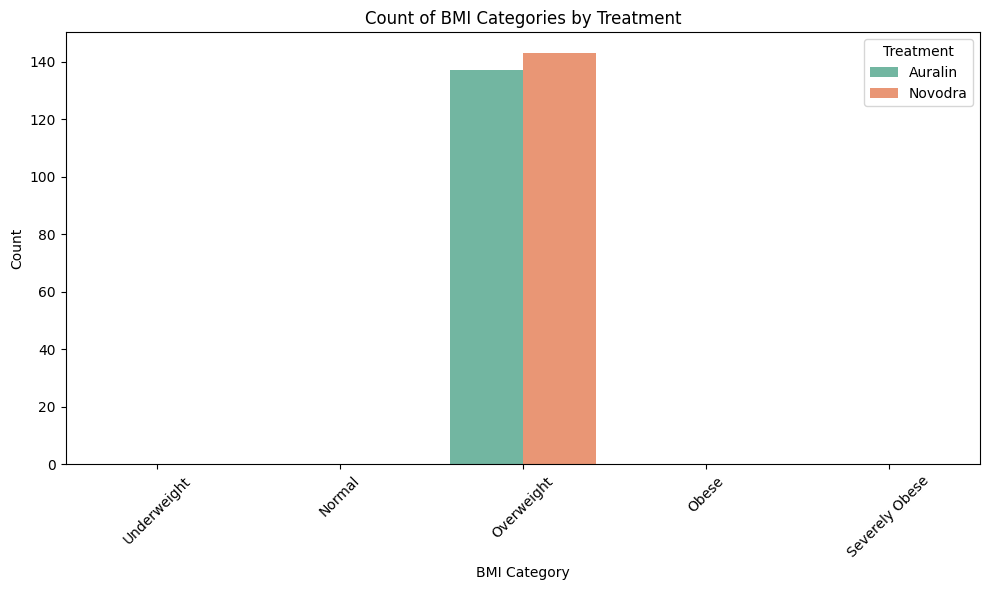

BMI count plot saved as 'bmi_treatment_countplot.png'


In [133]:
#Count plot of BMI categories by treatment
print("\nCreating count plot of BMI categories by treatment...")
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='bmi_cat', hue='treatment', palette='Set2')
plt.title('Count of BMI Categories by Treatment')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()
print("BMI count plot saved as 'bmi_treatment_countplot.png'")


Analyzing adverse reactions by age...


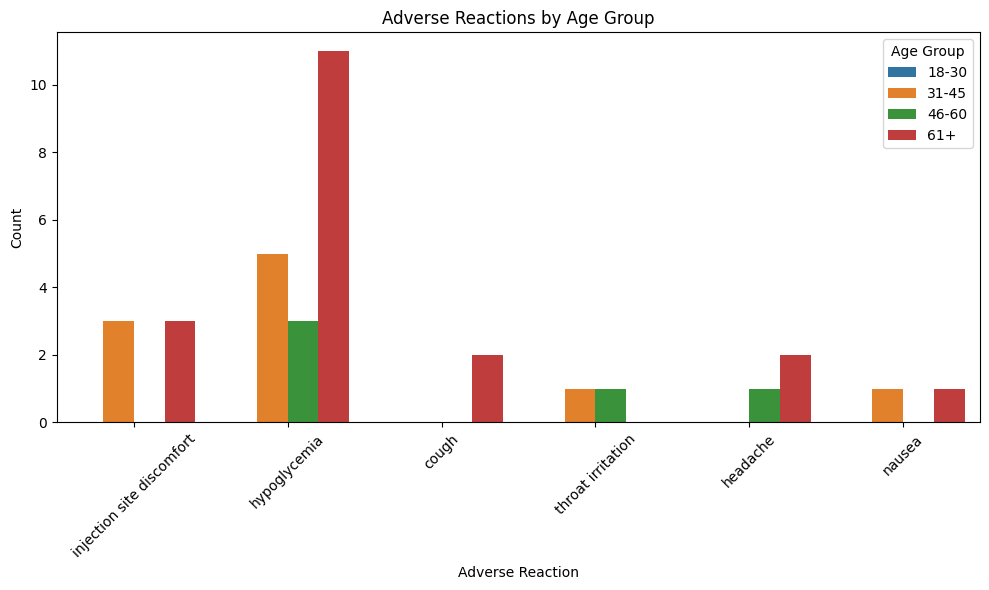

Adverse reactions bar plot saved as 'adverse_reactions_barplot.png'


In [134]:
#Analyze adverse reactions by age
print("\nAnalyzing adverse reactions by age...")
bins = [18, 30, 45, 60, 100]
labels = ['18-30', '31-45', '46-60', '61+']
adverse_with_age['age_group'] = pd.cut(adverse_with_age['age'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.countplot(data=adverse_with_age, x='adverse_reaction', hue='age_group')
plt.title('Adverse Reactions by Age Group')
plt.xlabel('Adverse Reaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()
plt.savefig('adverse_reactions_barplot.png')
plt.close()
print("Adverse reactions bar plot saved as 'adverse_reactions_barplot.png'")

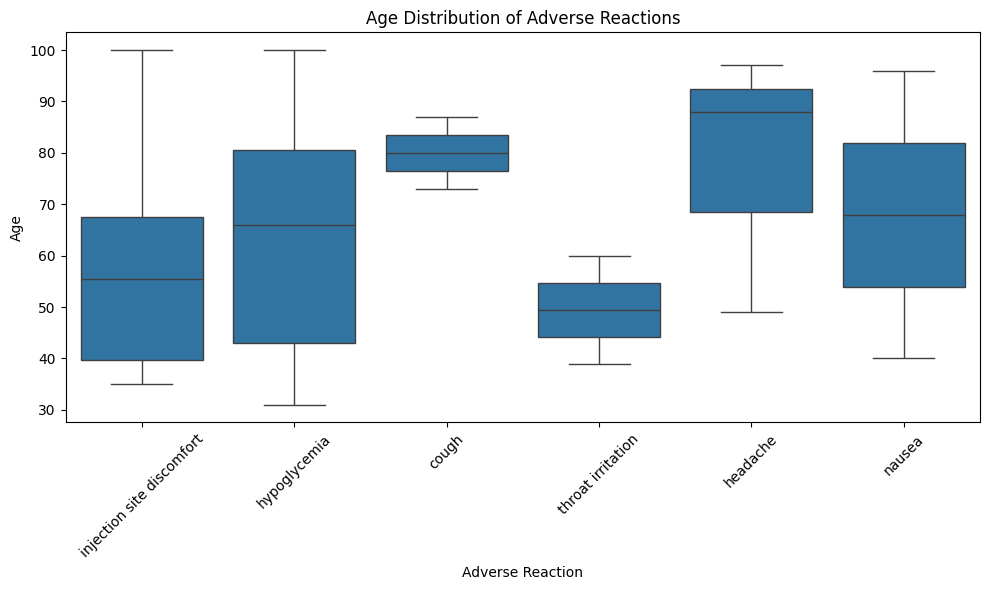

Adverse reactions box plot saved as 'adverse_reactions_boxplot.png'


In [135]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=adverse_with_age, x='adverse_reaction', y='age')
plt.title('Age Distribution of Adverse Reactions')
plt.xlabel('Adverse Reaction')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('adverse_reactions_boxplot.png')
plt.close()
print("Adverse reactions box plot saved as 'adverse_reactions_boxplot.png'")

In [136]:
#Conclusion on Auralin vs. Novodra
print("\nConclusion: Can Auralin replace Novodra?")
if p_value >= 0.05 and abs(diff) < 0.1:
    print("Auralin can potentially replace Novodra:")
    print("- No significant difference in HbA1c reduction (p >= 0.05).")
    print(f"- Small difference in means ({diff:.3f}), suggesting similar efficacy.")
    print("- Check adverse reactions: Similar profiles support replacement.")
else:
    print("Auralin may not replace Novodra:")
    if p_value < 0.05:
        print("- Significant difference in HbA1c reduction (p < 0.05).")
    if abs(diff) >= 0.1:
        print(f"- Large difference in means ({diff:.3f}), suggesting different efficacy.")
    print("- Review adverse reactions for further decision.")

print("\nAnalysis completed!")


Conclusion: Can Auralin replace Novodra?
Auralin may not replace Novodra:
- Significant difference in HbA1c reduction (p < 0.05).
- Review adverse reactions for further decision.

Analysis completed!
